<a href="https://colab.research.google.com/github/2303A51296Hindu/ADM2025/blob/main/lab_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

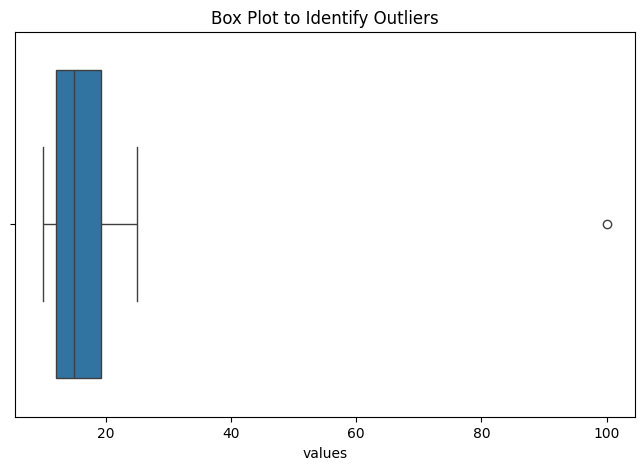

Detected Outliers:
     values
15     100

Data After Capping Outliers:
     values
0   10.000
1   12.000
2   12.000
3   13.000
4   12.000
5   12.000
6   14.000
7   15.000
8   15.000
9   16.000
10  18.000
11  19.000
12  20.000
13  22.000
14  25.000
15  30.125

Data After Removing Outliers:
     values
0       10
1       12
2       12
3       13
4       12
5       12
6       14
7       15
8       15
9       16
10      18
11      19
12      20
13      22
14      25

Data After Imputing Outliers:
      values
0   10.0000
1   12.0000
2   12.0000
3   13.0000
4   12.0000
5   12.0000
6   14.0000
7   15.0000
8   15.0000
9   16.0000
10  18.0000
11  19.0000
12  20.0000
13  22.0000
14  25.0000
15  20.9375


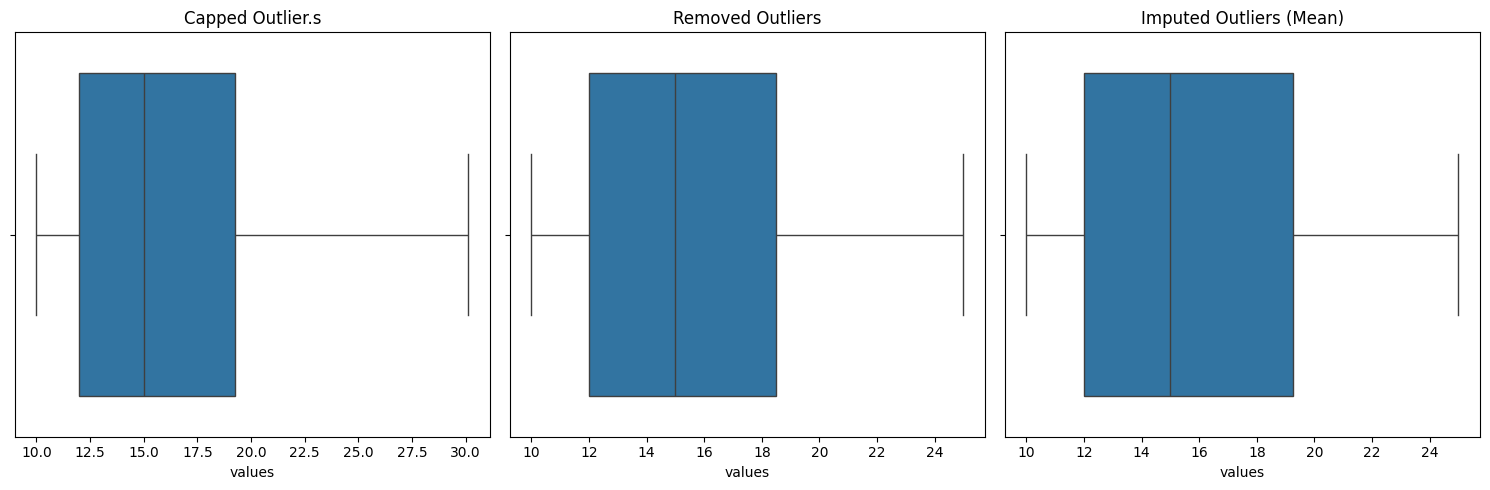

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'values': [10, 12, 12, 13, 12, 12, 14, 15, 15, 16, 18, 19, 20, 22, 25, 100]
 }
df = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='values')
plt.title('Box Plot to Identify Outliers')
plt.show()


Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['values'] < lower_bound) | (df['values'] > upper_bound)]
print("Detected Outliers:\n", outliers)
df_capped = df.copy()
df_capped['values'] = np.where(df_capped['values'] > upper_bound, upper_bound,
np.where(df_capped['values'] < lower_bound, lower_bound,
df_capped['values']))
df_removed = df[~((df['values'] < lower_bound) | (df['values'] > upper_bound))]
mean_value = df['values'].mean()
df_imputed = df.copy()
df_imputed['values'] = np.where((df['values'] < lower_bound) | (df['values'] > upper_bound),
mean_value, df_imputed['values'])
print("\nData After Capping Outliers:\n", df_capped)
print("\nData After Removing Outliers:\n", df_removed)
print("\nData After Imputing Outliers:\n", df_imputed)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df_capped, x='values')
plt.title('Capped Outlier.s')
plt.subplot(1, 3, 2)
sns.boxplot(data=df_removed, x='values')
plt.title('Removed Outliers')
plt.subplot(1, 3, 3)
sns.boxplot(data=df_imputed, x='values')
plt.title('Imputed Outliers (Mean)')
plt.tight_layout()
plt.show()

